In [1]:
import jax.numpy as jnp
# Other libraries
import numpy as np
import matplotlib.pyplot as plt
from labellines import labelLines
from matplotlib.lines import Line2D
plt.style.use('default')
import matplotlib.ticker as ticker
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    'font.size': 20
})

## In sample errors

In [2]:
err = jnp.load('errors.npy', allow_pickle=True).item()

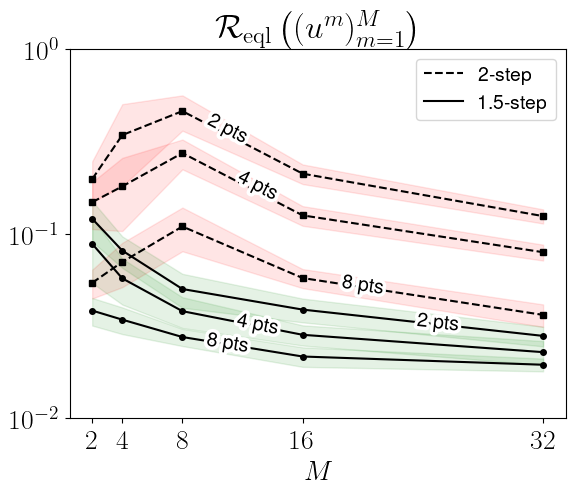

In [6]:
# In sample errors plot
NUM_FUN_LIST = [2,4,8,16,32]
NUM_RUNS = 10
OBS_PTS_LIST = [2,4,8]
# plt.title('In sample error: u_new ~ GP(0,RBF(0.5))')
ms = NUM_FUN_LIST
# Colors
c2 = 'black'
c1 = 'black'
# 2-step method plot
for obs_pt in OBS_PTS_LIST:
    # 2 method
    mean_i_opt_2 = jnp.array([jnp.mean(e) for e in jnp.array(err['2_mthd'][f'{obs_pt}_obs']['i_smpl'])])
    sd_i_opt_2 = jnp.array([jnp.std(e) for e in jnp.array(err['2_mthd'][f'{obs_pt}_obs']['i_smpl'])])
    # Plot 2 method
    plt.plot(ms, mean_i_opt_2, label = f'{obs_pt} pts', marker= 's', linestyle = 'dashed',markersize = 4, color = c2)
    plt.fill_between(ms, mean_i_opt_2 - sd_i_opt_2, mean_i_opt_2 + sd_i_opt_2, alpha=.1, color = 'red')
    plt.yscale('log')
    plt.minorticks_off()
# 1-step method plot
for obs_pt in OBS_PTS_LIST:
    # 1_5 method
    mean_i_opt_1_5 = jnp.array([jnp.mean(e) for e in jnp.array(err['1_5_mthd'][f'{obs_pt}_obs']['i_smpl'])])
    sd_i_opt_1_5 = jnp.array([jnp.std(e) for e in jnp.array(err['1_5_mthd'][f'{obs_pt}_obs']['i_smpl'])])
    # Plot 1_5 method
    plt.plot(ms, mean_i_opt_1_5, label = f'{obs_pt} pts', marker= 'o',markersize = 4, color = c1)
    plt.fill_between(ms, mean_i_opt_1_5 - sd_i_opt_1_5, mean_i_opt_1_5 + sd_i_opt_1_5, alpha=.1, color = 'green')
    plt.yscale('log')
    plt.minorticks_off()

major_tick_labels = [r'$2$', r'$4$', r'$8$', r'$16$', r'$32$']
major_tick_positions = [2, 4, 8, 16, 32]
plt.xticks(ticks = major_tick_positions, 
           labels = major_tick_labels, 
           minor=False
           )
plt.ylim([1e-2,1e-0])
plt.title(r'$\mathcal{R}_{\rm{eql}} \left((u^m)_{m=1}^M\right)$')
plt.xlabel(r'$M$')
# adding labels to the plotlines
xvals_2step = [11,13,20]
xvals_1step = [25,13,11]
xvals = xvals_2step + xvals_1step
lines = plt.gca().get_lines()
labelLines(lines, align=True, xvals = xvals,fontsize=14)
# add legend box
legend_elements = [Line2D([0], [0], color= c2, linestyle = 'dashed', label='2-step'),
                   Line2D([0], [0], color= c1, label='1.5-step')]
plt.legend(handles = legend_elements, loc = 'upper right', fontsize = 14)
plt.savefig('in_sample_errors.pdf',
            format = 'pdf',
            dpi = 300,
            bbox_inches='tight')
plt.show()